# Predict a BodyFat

 Body Density is costly and time consuming than Body Fat.
 we can easily find body fat using Density using Siri's Equation to compute percentage body fat 
 using the formula of siri is ((495/density) – 450)
    

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns

In [2]:
df=pd.read_csv("bodyfat1.csv")

In [3]:
df.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23.0,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22.0,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22.0,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26.0,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24.0,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24.0,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26.0,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25.0,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25.0,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23.0,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [4]:
df.shape

(257, 15)

In [5]:
df.dtypes

Density    float64
BodyFat    float64
Age        float64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

# Data Cleaning

In [6]:
#remove Null values

In [7]:
df.isnull().any()

Density     True
BodyFat     True
Age         True
Weight     False
Height     False
Neck       False
Chest       True
Abdomen     True
Hip         True
Thigh      False
Knee        True
Ankle       True
Biceps      True
Forearm     True
Wrist       True
dtype: bool

In [8]:
df.isnull().sum()

Density    2
BodyFat    2
Age        2
Weight     0
Height     0
Neck       0
Chest      1
Abdomen    1
Hip        1
Thigh      0
Knee       1
Ankle      1
Biceps     1
Forearm    1
Wrist      1
dtype: int64

In [9]:
#age is an one of the important factor in bodyfat and bmi so we drop that null rows

In [10]:
df=df.dropna(subset=['Age'])

In [11]:
df.isnull().sum()

Density    2
BodyFat    2
Age        0
Weight     0
Height     0
Neck       0
Chest      1
Abdomen    1
Hip        1
Thigh      0
Knee       1
Ankle      1
Biceps     1
Forearm    1
Wrist      1
dtype: int64

In [12]:
#checking null values in dataset

In [13]:
df[df.isna().any(axis=1)]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
110,NaN,NaN,47.0,151.50,66.75,36.9,94.0,86.1,95.2,58.1,36.5,22.1,30.6,27.5,17.6
131,1.0515,20.8,40.0,192.25,73.25,39.8,103.9,93.5,99.5,61.7,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,26.0,241.75,74.50,41.8,NaN,NaN,NaN,72.9,43.5,25.1,38.5,33.8,19.6


In [14]:
#out 255 there are three rows are having missing values ,so we drop the 3 rows

In [15]:
df=df.dropna(subset=['Density','Knee'])

In [16]:
df[df.isna().any(axis=1)]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [17]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [18]:
df.shape

(252, 15)

In [19]:
# the Data was Cleaned

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 256
Data columns (total 15 columns):
Density    252 non-null float64
BodyFat    252 non-null float64
Age        252 non-null float64
Weight     252 non-null float64
Height     252 non-null float64
Neck       252 non-null float64
Chest      252 non-null float64
Abdomen    252 non-null float64
Hip        252 non-null float64
Thigh      252 non-null float64
Knee       252 non-null float64
Ankle      252 non-null float64
Biceps     252 non-null float64
Forearm    252 non-null float64
Wrist      252 non-null float64
dtypes: float64(15)
memory usage: 31.5 KB


In [21]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


## Feature Engineering(Removing Outlieres)

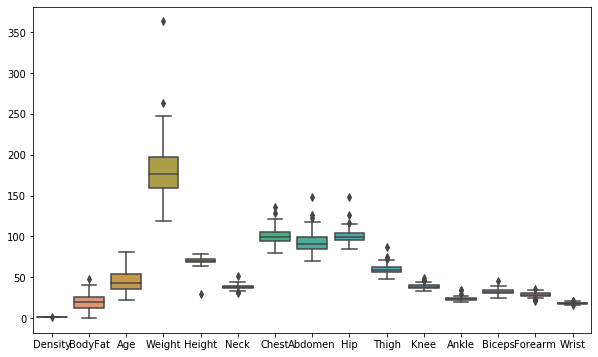

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df,ax=ax)
plt.show()

In [23]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [24]:
lowerbound,upperbound = outlier_treatment(df["Weight"])

In [25]:
lowerbound,upperbound

(102.0, 254.0)

In [26]:
df[( df["Weight"] < lowerbound) | (df["Weight"] > upperbound)]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
39,1.0202,35.2,46.0,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,1.0217,34.5,45.0,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4


In [27]:
lowerbound,upperbound = outlier_treatment(df["Abdomen"])

In [28]:
lowerbound,upperbound

(62.44999999999997, 121.45000000000002)

In [29]:
df[( df["Abdomen"] < lowerbound) | (df["Abdomen"] > upperbound)]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
39,1.0202,35.2,46.0,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,1.0217,34.5,45.0,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
220,0.9950,47.5,51.0,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [30]:
lowerbound,upperbound = outlier_treatment(df["Height"])

In [31]:
lowerbound,upperbound

(62.25, 78.25)

In [32]:
df[( df["Height"] < lowerbound) | (df["Height"] > upperbound)]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
42,1.025,32.9,44.0,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [33]:
lowerbound,upperbound = outlier_treatment(df["Hip"])

In [34]:
lowerbound,upperbound

(83.46249999999999, 115.56250000000001)

In [35]:
df[( df["Hip"] < lowerbound) | (df["Hip"] > upperbound)]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
35,1.0263,32.3,41.0,247.25,73.50,42.1,117.0,115.6,116.1,71.2,43.3,26.3,37.3,31.7,19.7
39,1.0202,35.2,46.0,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,1.0217,34.5,45.0,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4


In [36]:
# we didn't remove outlier from hip because it doesn't contain big difference because upper bound here is 115.56 but here 
#it has 116.1 so we didn't drop the row 

In [37]:
# outlieres are in index of 39,41,42,220 so we drop that rows from data sets

In [38]:
outlier_fianl = [220,41,42,39]

In [39]:
df.drop(outlier_fianl,axis=0,inplace=True)

In [40]:
# finaly we remove outlieres

# EDA( Exploratory Data Analysis)¶


In [41]:
#box plot(now it shows that we remove outlieres)

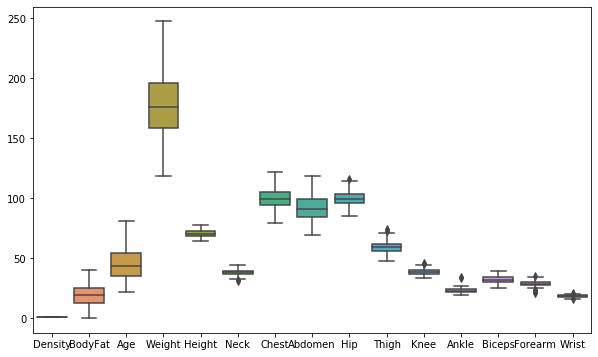

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df,ax=ax)
plt.show()

In [43]:
#Bar plot

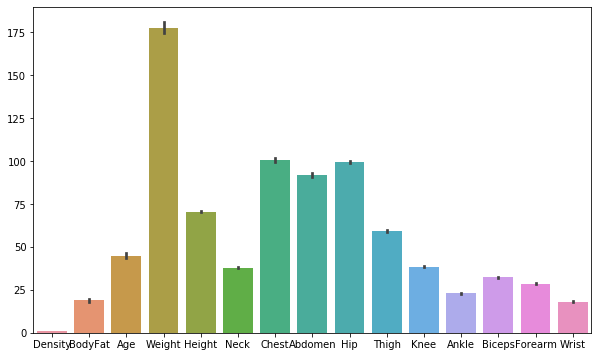

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df,ax=ax)
plt.show()

In [45]:
#pairplot

<Figure size 1080x720 with 0 Axes>

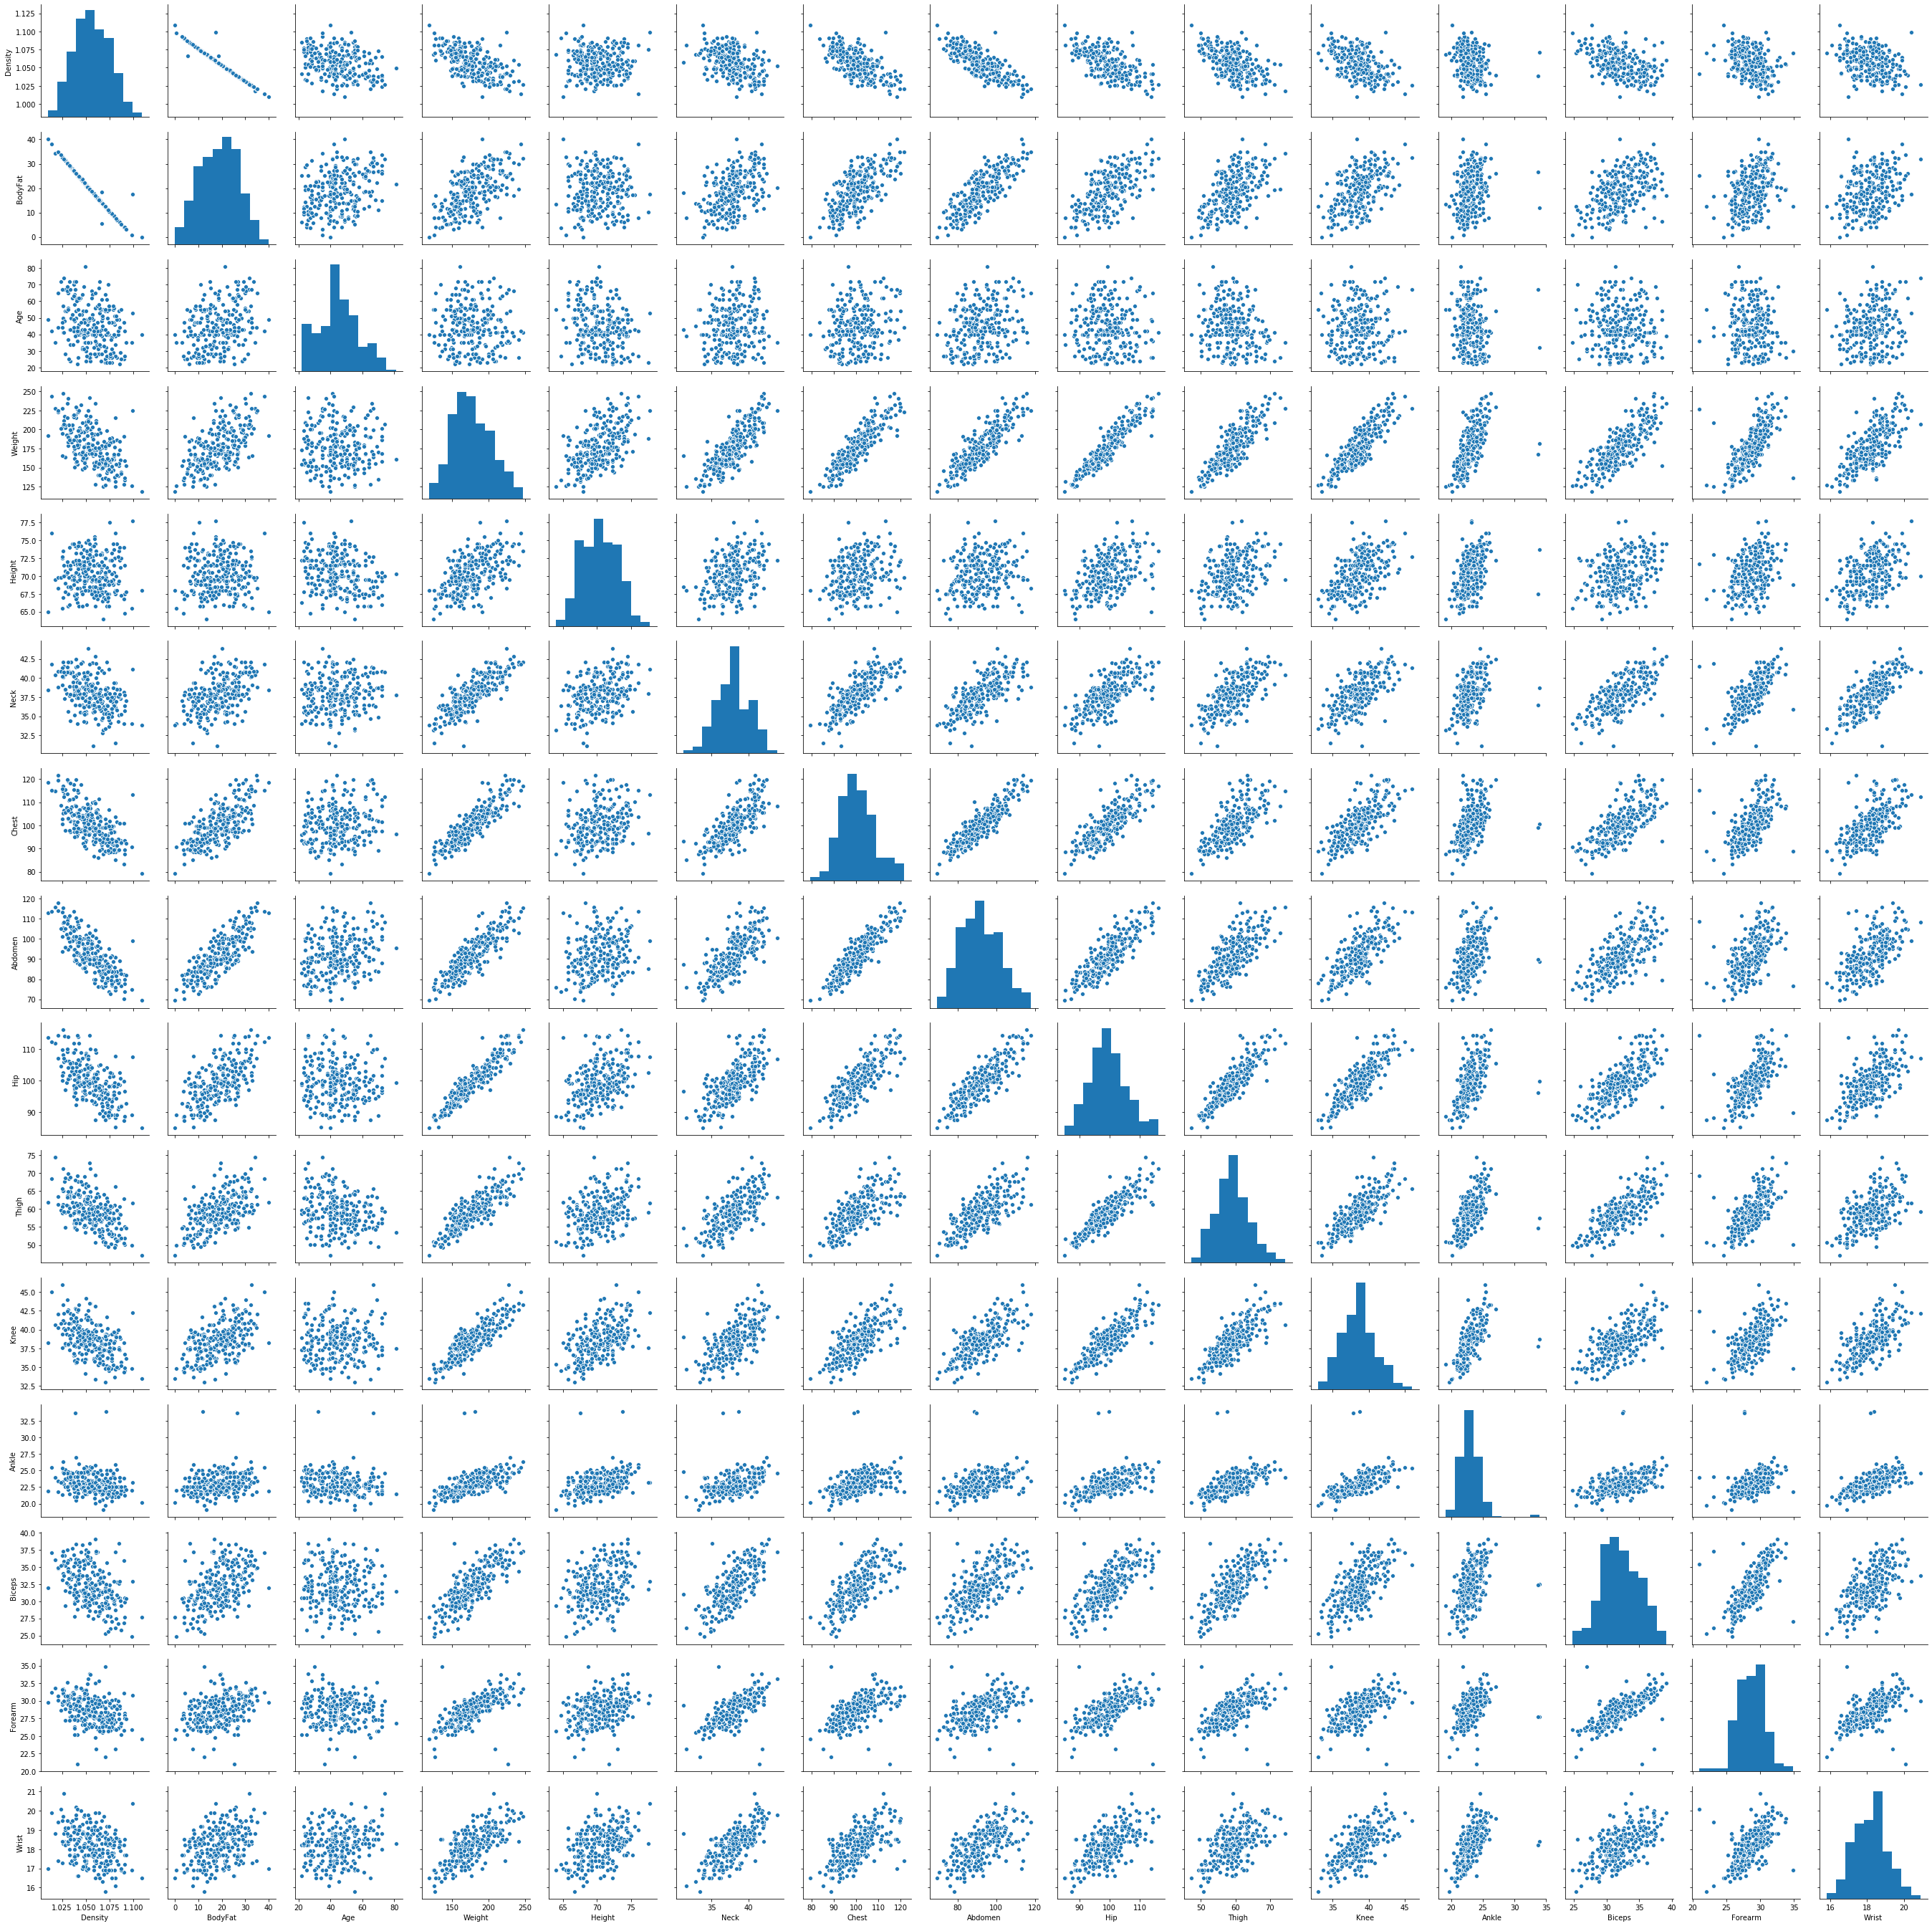

In [46]:
data = df.copy()
features = list(data.columns)
plt.figure(figsize=(15,10))
sns.pairplot(data)

In [47]:
#corelation matrix

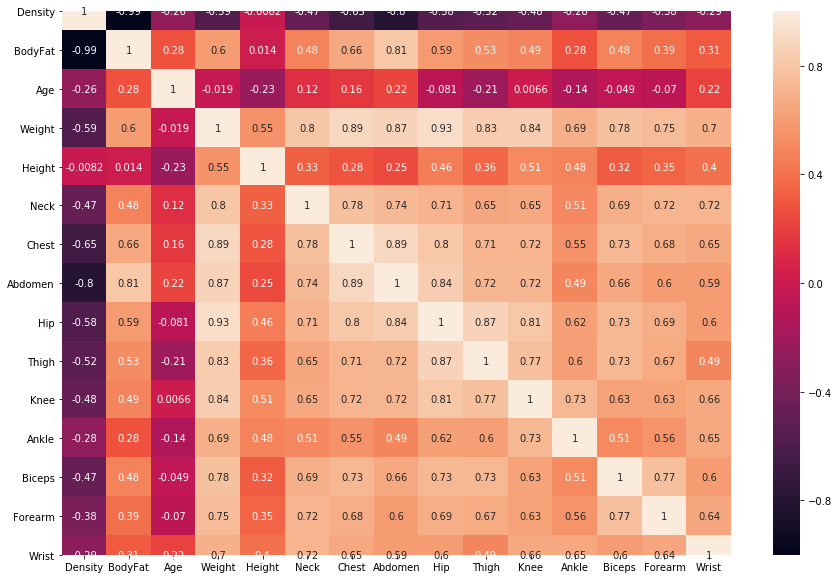

In [48]:
correlation = df[list(df.copy().columns)].corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()

Multicollinearity is present in the data
corelation between bodyfat and density is highly corelated negatively because predicting Body Density and then using Siri's Equation to compute percentage body fat using the formula of siri is ((495/density) – 450)

## Feature Engineering(handling Multicollinearity)

because of corelation between weight and height is high ,so we calculate Bmi and drop the coloumns of weight and height
and then we find an ratio of Abdomen:chest,Hip:Thigh,Knee:Ankle,Biceps:Forearm to reduce an corelation between each of them and delete the respective coloumns

In [49]:
df['Height']=df['Height']*2.54
df['Weight']=df['Weight']*0.453592
df['Bmi']=703*df['Weight']/(df['Height']*df['Height'])
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,1.0708,12.3,23.0,69.966566,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.660963
1,1.0853,6.1,22.0,78.584814,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.640404
2,1.0414,25.3,22.0,69.853168,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.734212
3,1.0751,10.4,26.0,83.801122,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.749291
4,1.0340,28.7,24.0,83.574326,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.793870


In [50]:
df['ACratio'] = df['Abdomen']/df['Chest']
df['HTratio'] = df['Hip']/df['Thigh']
df['KnAratio']=df['Knee']/df['Ankle']
df['BFratio']=df['Biceps']/df['Forearm']
df.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh','Knee','Ankle','Biceps','Forearm'],axis=1,inplace=True)
df.head()

,Density,BodyFat,Age,Neck,Wrist,Bmi,ACratio,HTratio,KnAratio,BFratio
0,1.0708,12.3,23.0,36.2,17.1,1.660963,0.915145,1.601695,1.703196,1.167883
1,1.0853,6.1,22.0,38.5,18.2,1.640404,0.886752,1.681431,1.594017,1.055363
2,1.0414,25.3,22.0,34.0,16.6,1.734212,0.917537,1.664430,1.620833,1.142857
3,1.0751,10.4,26.0,37.4,18.2,1.749291,0.848723,1.683860,1.635965,1.102041
4,1.0340,28.7,24.0,34.4,17.7,1.793870,1.027749,1.612342,1.758333,1.162455


In [51]:
#After that correlation matrix is shows how corelation is decreased between each feautures

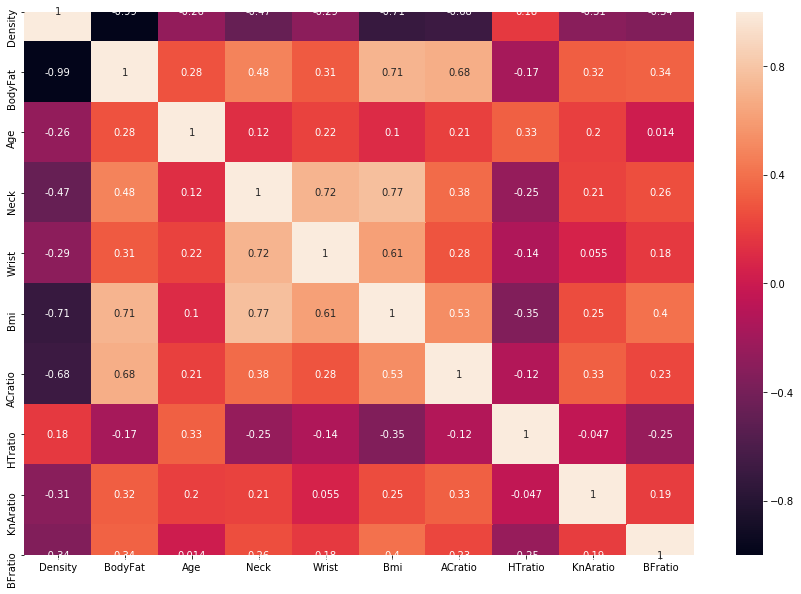

In [52]:
correlation = df[list(df.copy().columns)].corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()

# Model Building

In [53]:
#Choose Input Data and Output Data

In [54]:
y = df ['Density']

In [55]:
y[:10]

0    1.0708
1    1.0853
2    1.0414
3    1.0751
4    1.0340
5    1.0502
6    1.0549
7    1.0704
8    1.0900
9    1.0722
Name: Density, dtype: float64

In [56]:
x=df.drop(columns=['BodyFat','Density'],axis=1)

In [57]:
x[:2]

,Age,Neck,Wrist,Bmi,ACratio,HTratio,KnAratio,BFratio
0,23.0,36.2,17.1,1.660963,0.915145,1.601695,1.703196,1.167883
1,22.0,38.5,18.2,1.640404,0.886752,1.681431,1.594017,1.055363


In [58]:
x[:2]

,Age,Neck,Wrist,Bmi,ACratio,HTratio,KnAratio,BFratio
0,23.0,36.2,17.1,1.660963,0.915145,1.601695,1.703196,1.167883
1,22.0,38.5,18.2,1.640404,0.886752,1.681431,1.594017,1.055363


In [59]:
#Seperate test and train data 

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.2,random_state = 42)


In [61]:
y_test[:5]

34     1.0502
6      1.0549
190    1.0794
90     1.0666
164    1.0477
Name: Density, dtype: float64

from pair plot we note that some of the feautures are skewed , which is not normally distributed,
so we use a power transform will make the probability distribution of a variable more Gaussian. 
This is often described as removing a skew in the distribution,
although more generally is described as stabilizing the variance of the distribution

In [62]:
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

# Fit the model 

## Linear regression

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [64]:
model.intercept_ 

1.0560025252525254

In [65]:
model.score(X_test, y_test)

0.7260168686525197

In [66]:
y_pred = model.predict(X_test)

In [67]:
x_pred=model.predict(X_train)

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.0077984382138321885

In [69]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1.04379552, 1.06054284, 1.0611335 , 1.06917329, 1.06127096])

In [70]:
y_test.head()

34     1.0502
6      1.0549
190    1.0794
90     1.0666
164    1.0477
Name: Density, dtype: float64

In [71]:
r2_score = model.score(X_test,y_test)
print('accuracy score is:',r2_score*100,'%')

accuracy score is: 72.60168686525196 %


In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.0077984382138321885

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [74]:
print(" R2 score is:",r2,"\n","mean square error is:",mse,"\n","mean absolute error is:",mae,"\n","Root Mean Square Error (RMSE) is :",rmse)

 R2 score is: 0.7260168686525197 
 mean square error is: 9.222758356824436e-05 
 mean absolute error is: 0.0077984382138321885 
 Root Mean Square Error (RMSE) is : 0.009603519332424149


## Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
ridge_regr = Ridge(alpha=0.5)
ridge_regr.fit(X_train, y_train)
cv_score = cross_val_score(ridge_regr, X_train, y_train, cv=10)
cv_score= np.mean(cv_score)
y_pred_1= ridge_regr.predict(X_test)
Score_1= ridge_regr.score(X_test, y_test)
rmse_1= mean_squared_error(y_test, y_pred_1)

In [76]:
print(" CV score is:",cv_score,"\n","accuracy score:",Score_1,"\n","Root Mean Square Error (RMSE) is :","{0:.10f}".format(rmse_1))


 CV score is: 0.6101504169480582 
 accuracy score: 0.725206936430357 
 Root Mean Square Error (RMSE) is : 0.0000925002


1.R2 score: the standards for a good R-Squared reading can be much higher, such as 0.9 or above, R2 score inbetween 0.65-0.85 is good , below 0.6 it's not an better model
2.Mean Squared Error ( MSE ) is defined as Mean or Average of the square of the difference between actual and estimated values.
3.Mean Absolute Error ( MAE ) is the sum of the absolute difference between actual and predicted values.
4.Root Mean Square Error ( RMSE ) is also used as a measure for model evaluation. It is the square root of Mean Squared Error (MSE)


## Selecting the Model

In [77]:
h=[{"linear":r2,"Ridge":Score_1}]
fg=pd.DataFrame(h)
print("\n Accuracy score")
display(fg)
g=[{"linear":rmse,"Ridge":rmse_1}]
gf=pd.DataFrame(g)
print("\n Rmse Values")
display(gf)


 Accuracy score


,linear,Ridge
0,0.726017,0.725207



 Rmse Values


,linear,Ridge
0,0.009604,0.000093


Text(0.5, 1.0, 'Models and their accuracy')

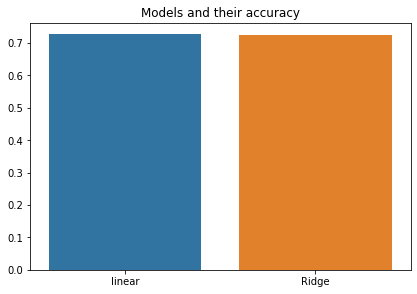

In [78]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.barplot(data=fg)
plt.title("Models and their accuracy")


#### so both models are give same results so i take Linear regression it gives accuarcy very little better than Ridge Regression,I perform lasso , Random forest that all models are performed very low 

### Finaly we choose Linear Regression

## Test vs Predicted value

Text(0.5, 1.0, 'Test Vs Predicted')

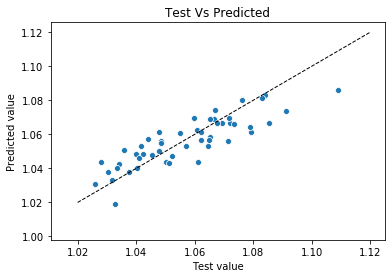

In [79]:
y_pred = model.predict(X_test)
sns.scatterplot(y_test,y_pred)
plt.plot([1.02,1.12 ], [1.02,1.12], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Test value")
plt.ylabel("Predicted value")
plt.title("Test Vs Predicted")

# To predict the body fat using Density

In [80]:
def predict(values):
    density = model.predict(values)
    fat = (495/density[0] - 450)
    print(f'Density: {density[0]} g/cc\nPercentage Body Fat: {fat} %\n')

In [81]:
# find the body fat

In [82]:
predict(X_test[5].reshape(1,-1))

Density: 1.0485529744113296 g/cc
Percentage Body Fat: 22.079152965923413 %



# Saving Model for future use



In [83]:
import pickle
pickle.dump(trans,open('transformer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))